In [103]:
import os
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import seaborn as sbn
import matplotlib.pyplot as plt

In [104]:
os.listdir()

['.ipynb_checkpoints',
 'diabaties2.png',
 'diabetes.png',
 'Social_Network_Ads.csv',
 'Untitled.ipynb']

In [105]:
data = pd.read_csv("Social_Network_Ads.csv")
df=pd.DataFrame(data)

In [106]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
User ID            400 non-null int64
Gender             400 non-null object
Age                400 non-null int64
EstimatedSalary    400 non-null int64
Purchased          400 non-null int64
dtypes: int64(4), object(1)
memory usage: 15.7+ KB


In [108]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


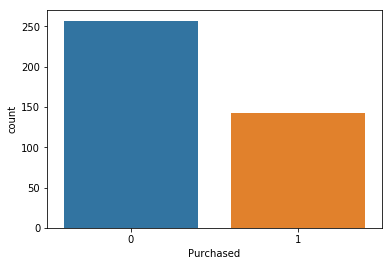

In [109]:
# visualising 
sbn.countplot(df.Purchased)

as you can see from the above graph that less people purchased the ads

[]

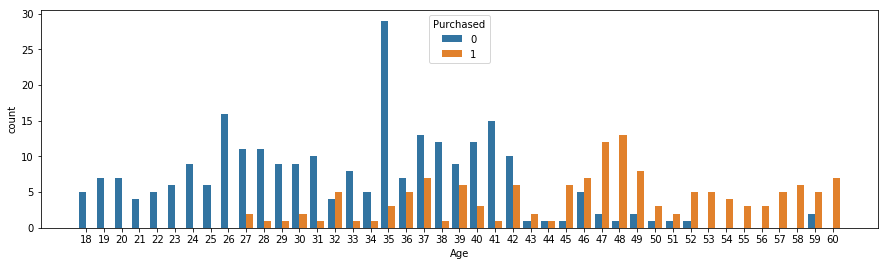

In [110]:
plt.figure(figsize=(15,4))
sbn.countplot(df.Age,hue=df.Purchased)
plt.plot()

as you can see that the people of age 18 to 25 didnt purchases the ad

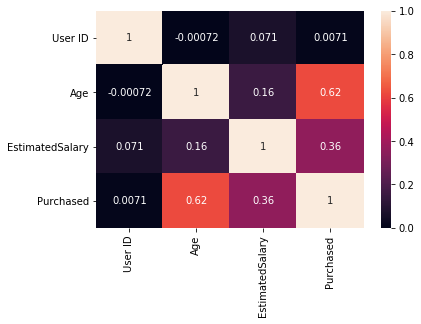

In [111]:
#relation between all the variables
sbn.heatmap(df.corr(),annot=True)

as you can see the above graph.. as the userid is unqiue for all the customer so it is weekly correlated with the dependent varibale


In [132]:
#imputation
#dropping the columns which are not necessary
df.drop("User ID",axis=1,inplace=True)

In [125]:
#checking if any missing values are there
df.isnull().sum()

Age                0
EstimatedSalary    0
Purchased          0
Gender_Female      0
Gender_Male        0
dtype: int64

In [126]:
# we have to convert Gender in such a form that alogorith can work on
df=pd.get_dummies(df)

In [127]:
#splitting the dependent and independent variable
X = df.drop("Purchased",axis=1)
y = df.Purchased

In [128]:
#splitting the training and testing dataset
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=101)

In [129]:
# model training
model = DecisionTreeClassifier(criterion="gini") # here we are using gini as a splitting criteria
model.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [130]:
y_pred = model.predict(X_test)

In [131]:
accuracy_score(y_pred,y_test)

0.875

In [92]:
confusion_matrix(y_pred,y_test)

array([[47,  4],
       [ 7, 22]], dtype=int64)

In [93]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO
from IPython.display import Image
import pydotplus

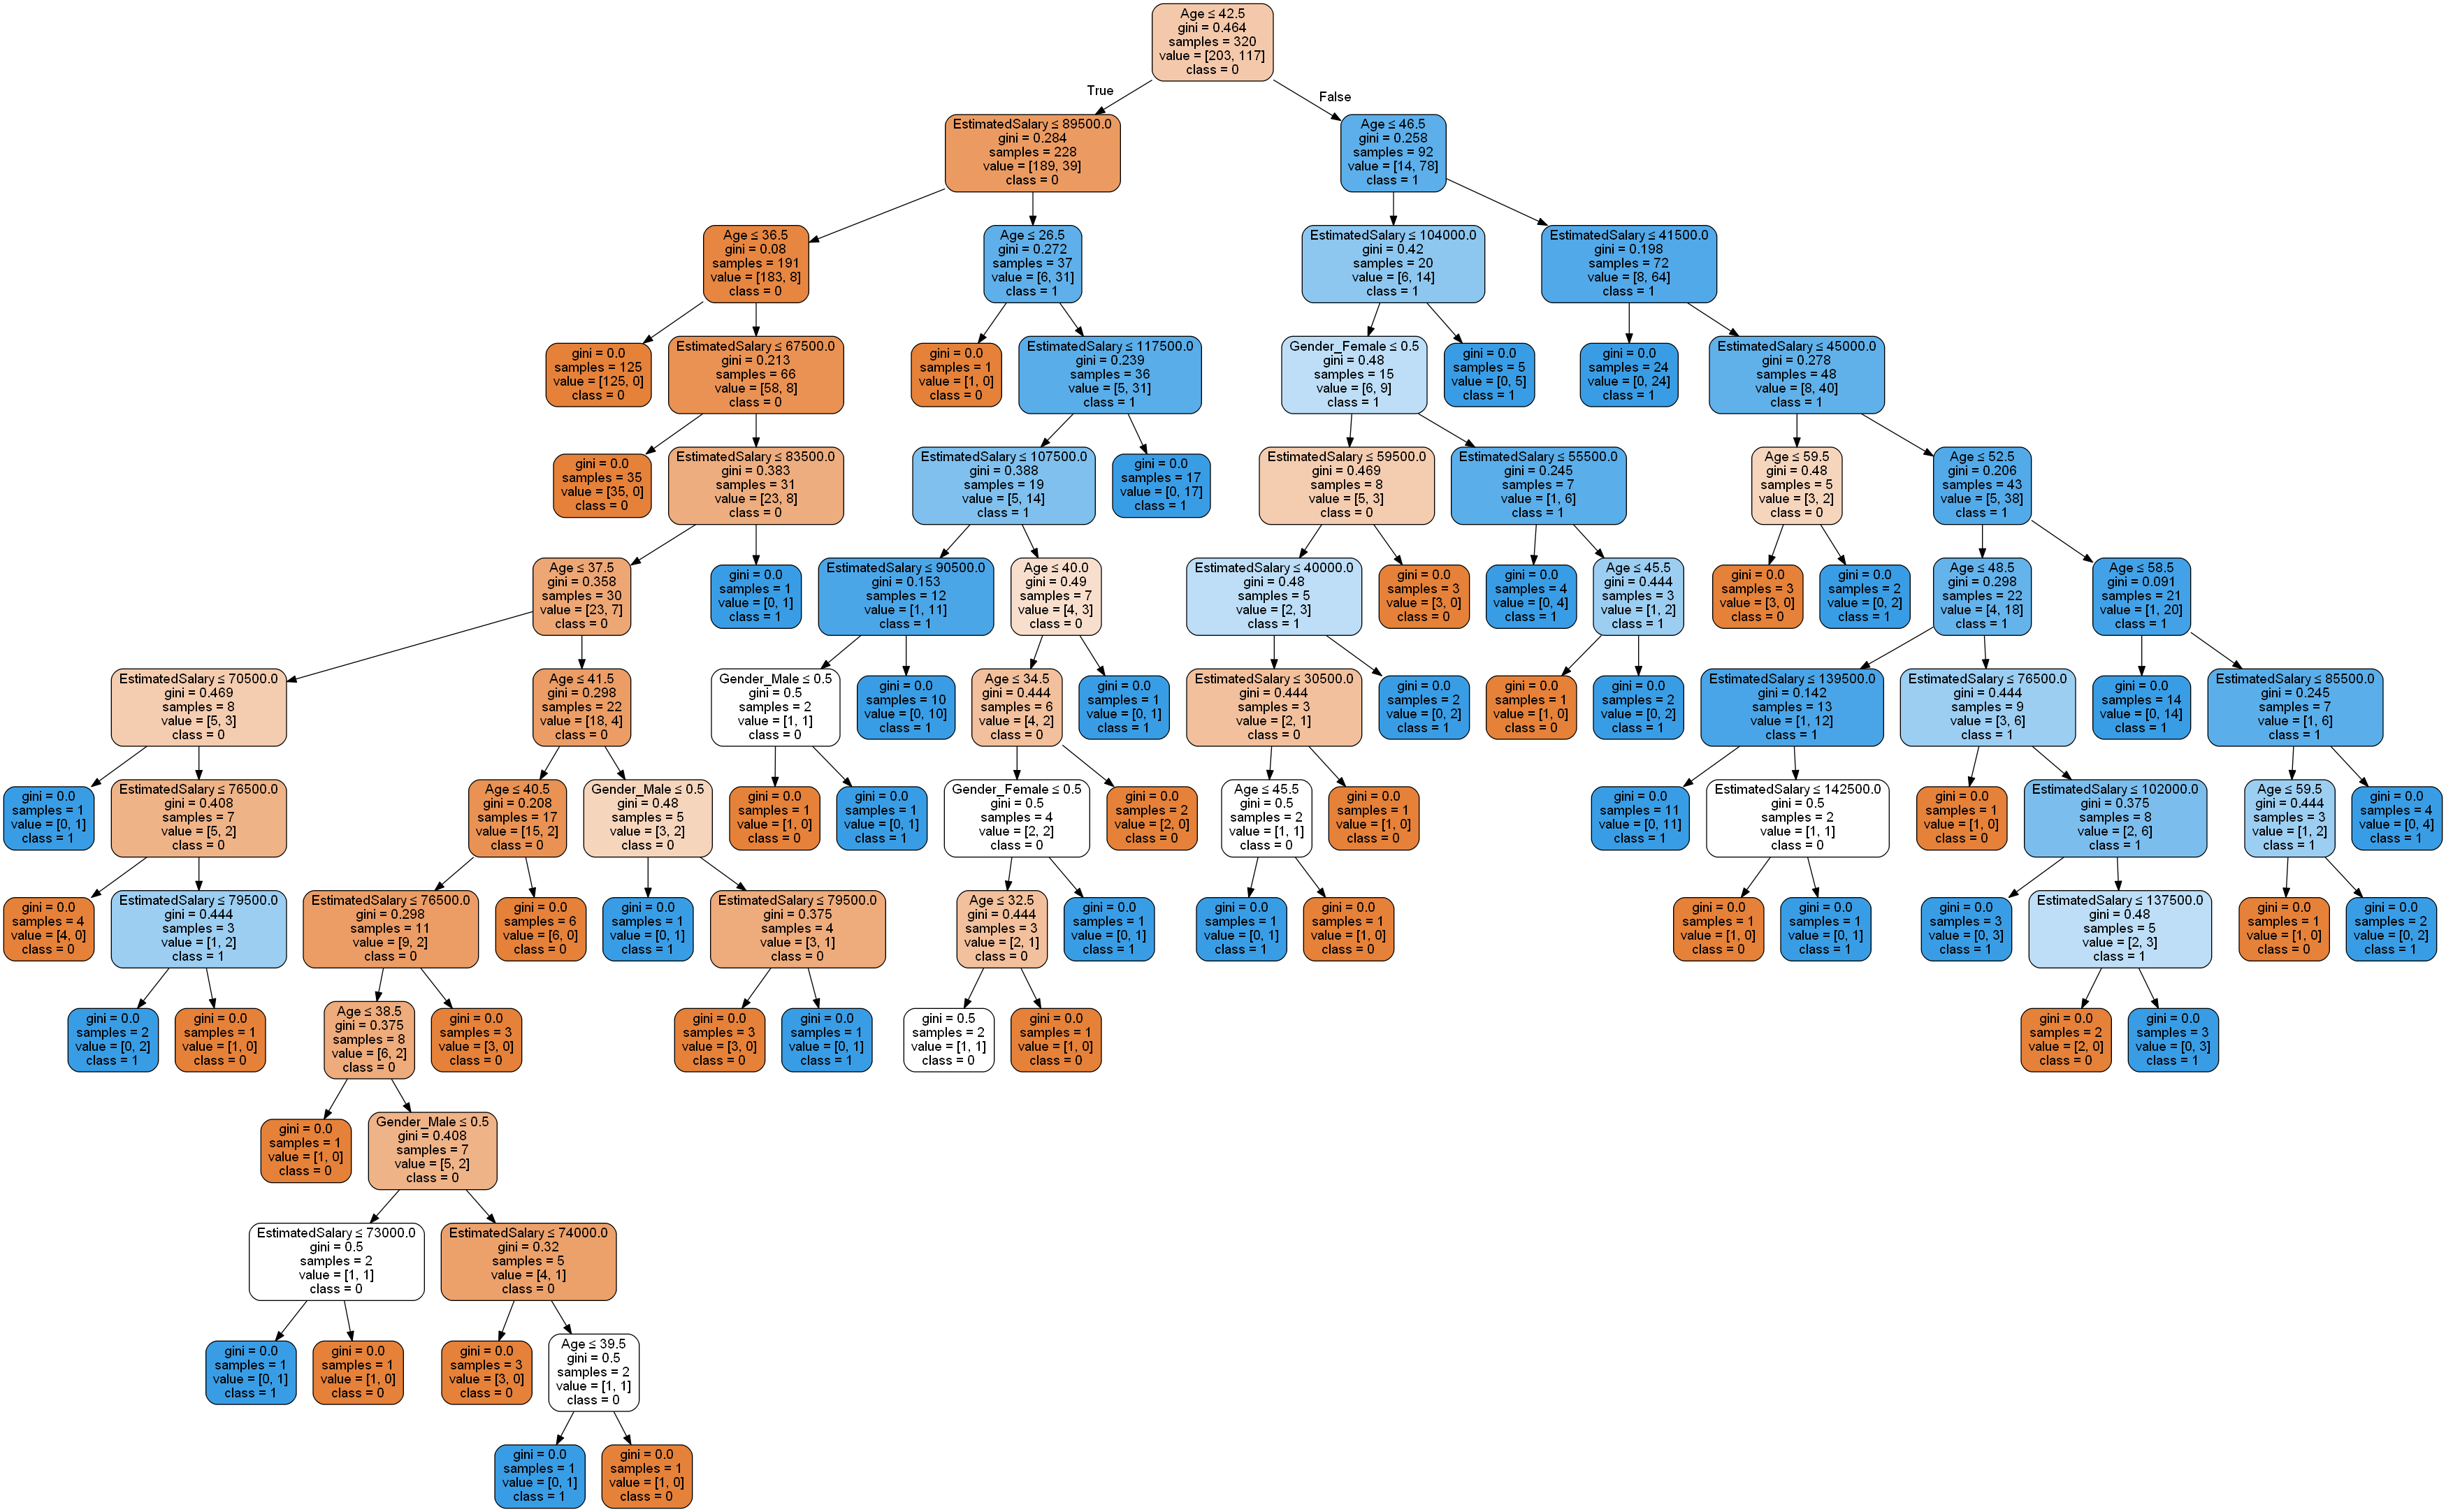

In [133]:
dot_data = StringIO()
export_graphviz(model,
                out_file=dot_data,
                filled=True,
                rounded=True,
                special_characters=True,
                feature_names=['Age','EstimatedSalary','Gender_Male','Gender_Female'],
                class_names=['0','1']
               )
graph=pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('ads2.png')
Image(graph.create_png())

In [117]:
model2 = DecisionTreeClassifier(criterion="entropy")
model2.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [118]:
y_pred = model2.predict(X_test)

In [119]:
accuracy_score(y_test,y_pred)

0.8625

as you can see that when  we use entropy as the splitting criteria the accuracy get decrease by approx 1%

In [98]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO
from IPython.display import Image
import pydotplus

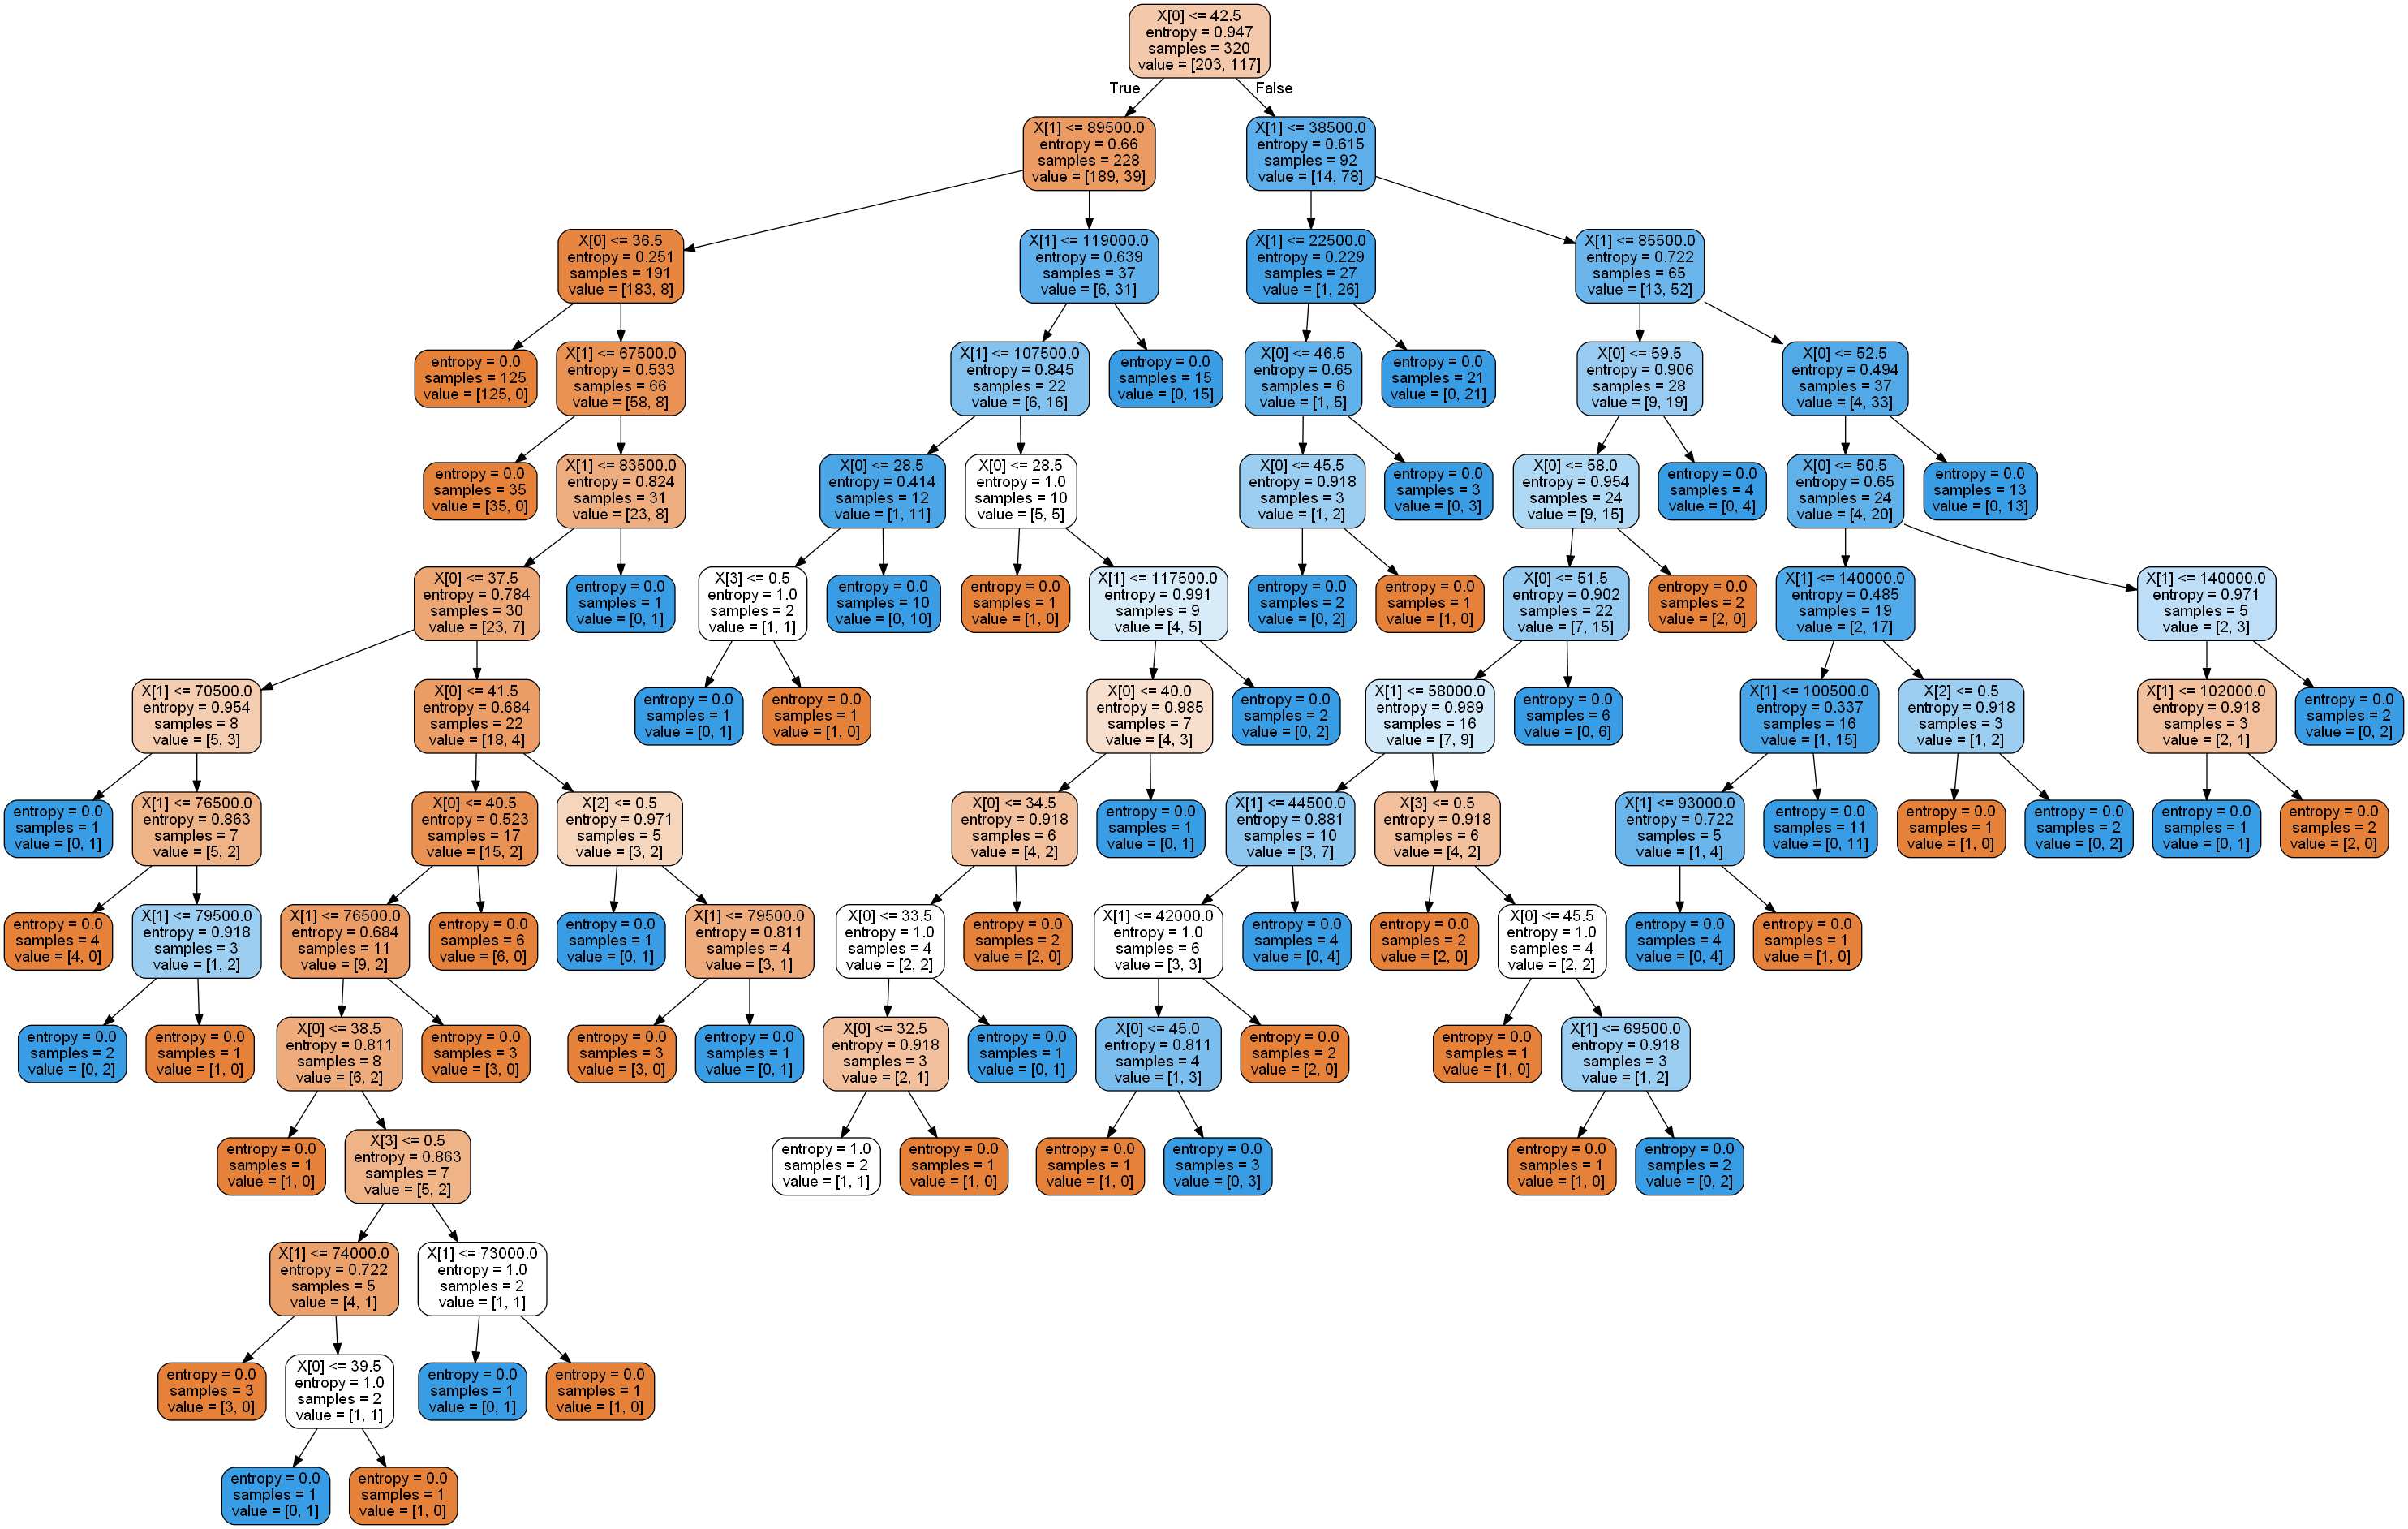

In [134]:
dot_data=StringIO()
export_graphviz(model2,out_file=dot_data,rounded=True,filled=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png("ads2.png")
Image(graph.create_png())
